<a href="https://colab.research.google.com/github/Yuliana2001/lab3_biosenales/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#la librería scipy sirve para cargar archivos con la extensión mat
contenido=io.loadmat('/content/drive/MyDrive/Laboratorio_bioseñales/Tercera_practica/signals.mat')
print(contenido)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015', '__version__': '1.0', '__globals__': [], 'Fs': array([[1024]], dtype=uint16), 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]]), 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]), 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
        220.4135886 , 151.5810508 ]]), 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
        -539.9349533 , -772.65519631]]), 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
        1416.109375  , 1352.75012207]]), 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
        -3791.24267578, -3924.6550293 , -4109.94433594]])}


In [ ]:
#obtener las llaves para saber encontrar las posiciones de las señales
print(contenido.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


In [ ]:
contenido['ECG_asRecording'].shape

(1, 30720)

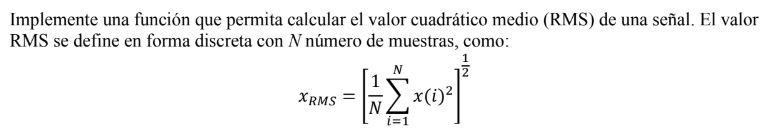

In [5]:
#como único parámetro será el tipo de señal que se requiera
def valorCuadratico(signal):
  N=len(signal[0])
  Xrms=np.sqrt(np.sum(signal[0]**2)/N)
  return Xrms

In [5]:
#PARA LA SEÑAL ECG
print(valorCuadratico(contenido['ECG_asRecording']))

4392.9682937490725


In [6]:
contenido['ECG_asRecording'][0]

array([3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
       4365.31103516, 4370.91796875])

**A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo.**


In [6]:
Fs = contenido['Fs'][0][0]  # 1024 Hz
print("Frecuencia "+str(Fs))

tiempo1 = np.arange(len(contenido['ECG_asRecording'][0])) / Fs
tiempo2 = np.arange(len(contenido['ECG_filtered'][0])) / Fs
tiempo3 = np.arange(len(contenido['EMG_filtered1'][0])) / Fs
tiempo4 = np.arange(len(contenido['EMG_filtered2'][0])) / Fs
tiempo5 = np.arange(len(contenido['EMG_asRecording1'][0])) / Fs
tiempo6 = np.arange(len(contenido['EMG_asRecording2'][0])) / Fs
print("Primeros valores del vector de tiempo de las ECG:", tiempo1[:10])
print("Primeros valores del vector de tiempo de las ECG_filtered:", tiempo2[:10])
print("Primeros valores del vector de tiempo de las EMG1:", tiempo3[:10])
print("Primeros valores del vector de tiempo de las EMG2:", tiempo4[:10])
print("Primeros valores del vector de tiempo de las EMG_asRecording1:", tiempo5[:10])
print("Primeros valores del vector de tiempo de las EMG_asRecording2:", tiempo6[:10])


Frecuencia 1024
Primeros valores del vector de tiempo de las ECG: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las ECG_filtered: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las EMG1: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las EMG2: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las EMG_asRecording1: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906]
Primeros valores del vector de tiempo de las EMG_asRecording2: [0.         0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.0

**Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser
el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.**

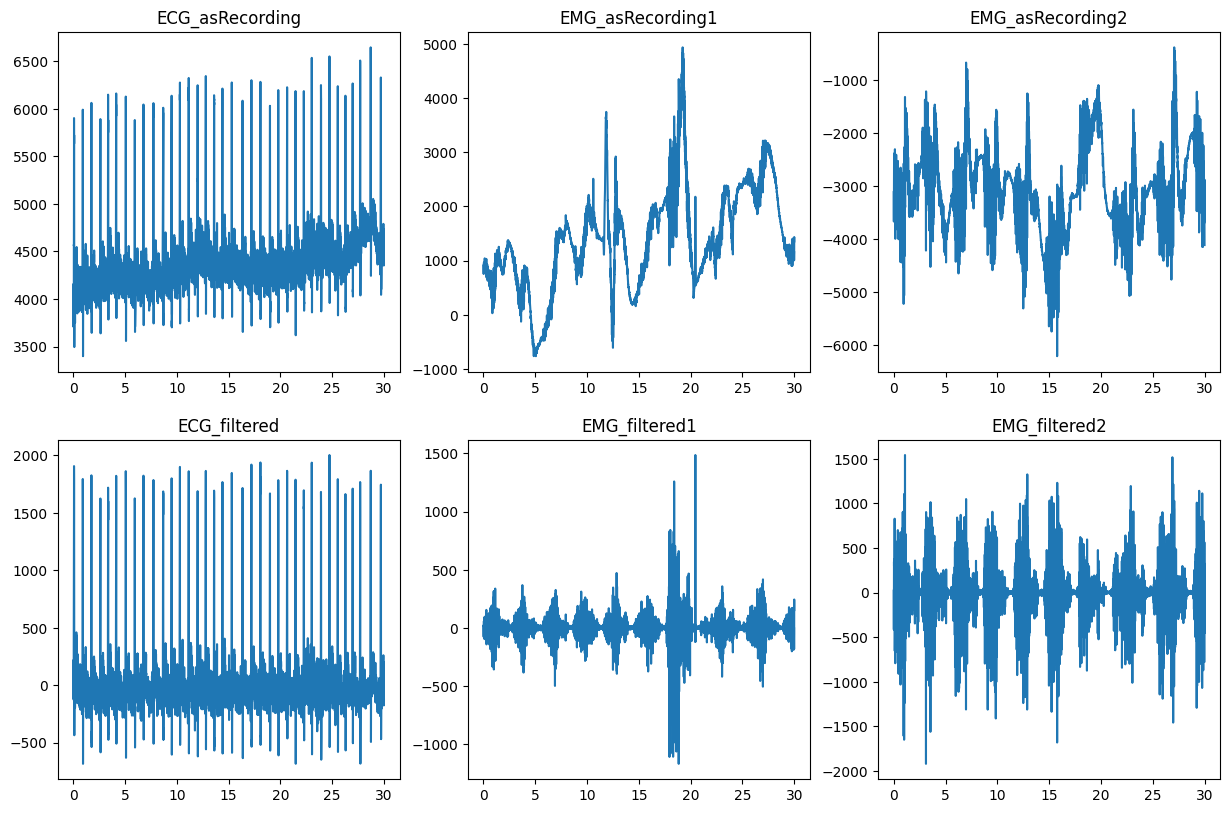

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.plot(tiempo1, contenido['ECG_asRecording'][0])
plt.title('ECG_asRecording')
plt.subplot(3,3,4)
plt.plot(tiempo2, contenido['ECG_filtered'][0])
plt.title('ECG_filtered')
plt.subplot(3,3,5)
plt.plot(tiempo3, contenido['EMG_filtered1'][0])
plt.title('EMG_filtered1')
plt.subplot(3,3,6)
plt.plot(tiempo4, contenido['EMG_filtered2'][0])
plt.title('EMG_filtered2')
plt.subplot(3,3,2)
plt.plot(tiempo5, contenido['EMG_asRecording1'][0])
plt.title('EMG_asRecording1')
plt.subplot(3,3,3)
plt.plot(tiempo6, contenido['EMG_asRecording2'][0])
plt.title('EMG_asRecording2')
plt.show()

**Análisis a partir de las gráficas**
---


> ECG

Probablemente se aplicó un filtro pasa bajos para eliminar el ruido de alta frecuencia y un filtro pasa altos para eliminar el componente DC, ya que se evidencia que la señal parece más centrada en torno a 0, indicando una posible eliminación del componente DC.


> EMG 1 y 2

Principalmente se observa bastante ruido, típico de señales EMG, pero ya filtradas se evidencia una redución del ruido de baja frecuencia y la línea base está más estable, por lo que se hace uso de un filtro pasa banda que eliminó tanto componentes de baja frecuencia como de alta frecuencia.







**Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el
promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.**


In [22]:
def estadisticas(ciclo):
    media = np.mean(ciclo)
    rms = np.sqrt(np.mean(ciclo**2))
    varianza = np.var(ciclo)
    desviacion = np.std(ciclo)
    return media, rms, varianza, desviacion

Duración del ciclo cardíaco: 0.49 segundos


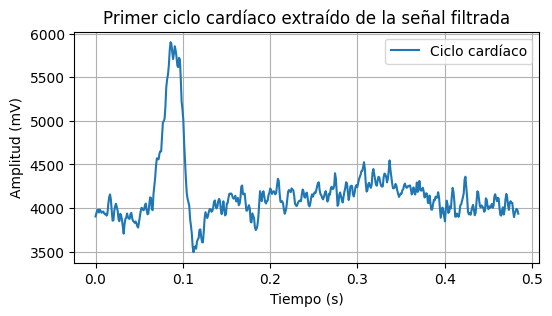

Media: 4162.6014
RMS: 4178.6456
Varianza: 133828.3071
Desviación estándar: 365.8255


In [24]:
# para seleccionar un ciclo cardíaco se requiere hacer un análisis de la
# señal para obtener los picos QRS, para ello se hace del módulo de SciPy
# que es especializado en procesamiento de señales
from scipy.signal import find_peaks
# Simulación de señal ECG
ecg_signal = contenido['ECG_asRecording'][0]

# 2. Detección de picos R (ajustar umbral si hace falta)
# se elige 0.6, porque es simplemente un umbral para decir que quiero los picos
# que superen el 60% del valor máximo de la señal.
peaks, _ = find_peaks(ecg_signal, height=np.max(ecg_signal) * 0.6, distance=Fs//2)
ventana_antes = int(0.2 * Fs)  # 200 ms antes
ventana_despues = int(0.4 * Fs)  # 400 ms después

if len(peaks) > 1:
    r_index = peaks[0]
    inicio = max(r_index - ventana_antes, 0)
    fin = min(r_index + ventana_despues, len(ecg_signal))

    ciclo = ecg_signal[inicio:fin]
    tiempo_ciclo = tiempo1[inicio:fin]
    duracion_ciclo = (fin - inicio) / Fs
    print(f"Duración del ciclo cardíaco: {duracion_ciclo:.2f} segundos")

    plt.figure(figsize=(6, 3))
    plt.plot(tiempo_ciclo, ciclo, label="Ciclo cardíaco")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (mV)")
    plt.title("Primer ciclo cardíaco extraído de la señal filtrada")
    plt.legend()
    plt.grid(True)
    plt.show()

    media, rms, varianza, desviacion=estadisticas(ciclo)

    print(f"Media: {media:.4f}")
    print(f"RMS: {rms:.4f}")
    print(f"Varianza: {varianza:.4f}")
    print(f"Desviación estándar: {desviacion:.4f}")
else:
    print("No se detectaron suficientes picos R para extraer un ciclo.")




**Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.**



Duración del ciclo cardíaco: 0.49 segundos


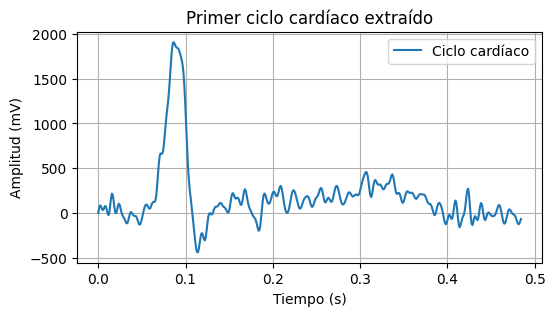

Media: 180.2678
RMS: 411.8226
Varianza: 137101.3482
Desviación estándar: 370.2720


In [28]:
from scipy.signal import find_peaks
# Simulación de señal ECG
ecg_signal_filtered = contenido['ECG_filtered'][0]

# 2. Detección de picos R (ajustar umbral si hace falta)
# se elige 0.6, porque es simplemente un umbral para decir que quiero los picos
# que superen el 60% del valor máximo de la señal.
peaks, _ = find_peaks(ecg_signal_filtered, height=np.max(ecg_signal_filtered) * 0.6, distance=Fs//2)
ventana_antes = int(0.2 * Fs)  # 200 ms antes
ventana_despues = int(0.4 * Fs)  # 400 ms después

if len(peaks) > 1:
    r_index = peaks[0]
    inicio = max(r_index - ventana_antes, 0)
    fin = min(r_index + ventana_despues, len(ecg_signal_filtered))

    ciclo = ecg_signal_filtered[inicio:fin]
    tiempo_ciclo = tiempo1[inicio:fin]
    duracion_ciclo = (fin - inicio) / Fs
    print(f"Duración del ciclo cardíaco: {duracion_ciclo:.2f} segundos")

    plt.figure(figsize=(6, 3))
    plt.plot(tiempo_ciclo, ciclo, label="Ciclo cardíaco")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (mV)")
    plt.title("Primer ciclo cardíaco extraído")
    plt.legend()
    plt.grid(True)
    plt.show()

    media, rms, varianza, desviacion=estadisticas(ciclo)

    print(f"Media: {media:.4f}")
    print(f"RMS: {rms:.4f}")
    print(f"Varianza: {varianza:.4f}")
    print(f"Desviación estándar: {desviacion:.4f}")
else:
    print("No se detectaron suficientes picos R para extraer un ciclo.")




**Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique
cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?**

Ciclo 1: Media = 180.2678, Varianza = 137101.3482
Ciclo 2: Media = 30.2233, Varianza = 114297.3245
Ciclo 3: Media = 24.9233, Varianza = 109938.5826
Ciclo 4: Media = 14.9748, Varianza = 98744.5545
Ciclo 5: Media = 38.2113, Varianza = 100020.9063
Ciclo 6: Media = 36.8958, Varianza = 112180.6166
Ciclo 7: Media = 37.1123, Varianza = 115582.6885
Ciclo 8: Media = 27.8831, Varianza = 95438.4561
Ciclo 9: Media = 42.1313, Varianza = 109019.8147
Ciclo 10: Media = 53.1797, Varianza = 107056.8939
Ciclo 11: Media = 26.4407, Varianza = 99280.9363
Ciclo 12: Media = 22.9223, Varianza = 106876.5226
Ciclo 13: Media = 45.5328, Varianza = 116486.7888
Ciclo 14: Media = 23.9602, Varianza = 118600.6725
Ciclo 15: Media = 38.7334, Varianza = 100943.3444


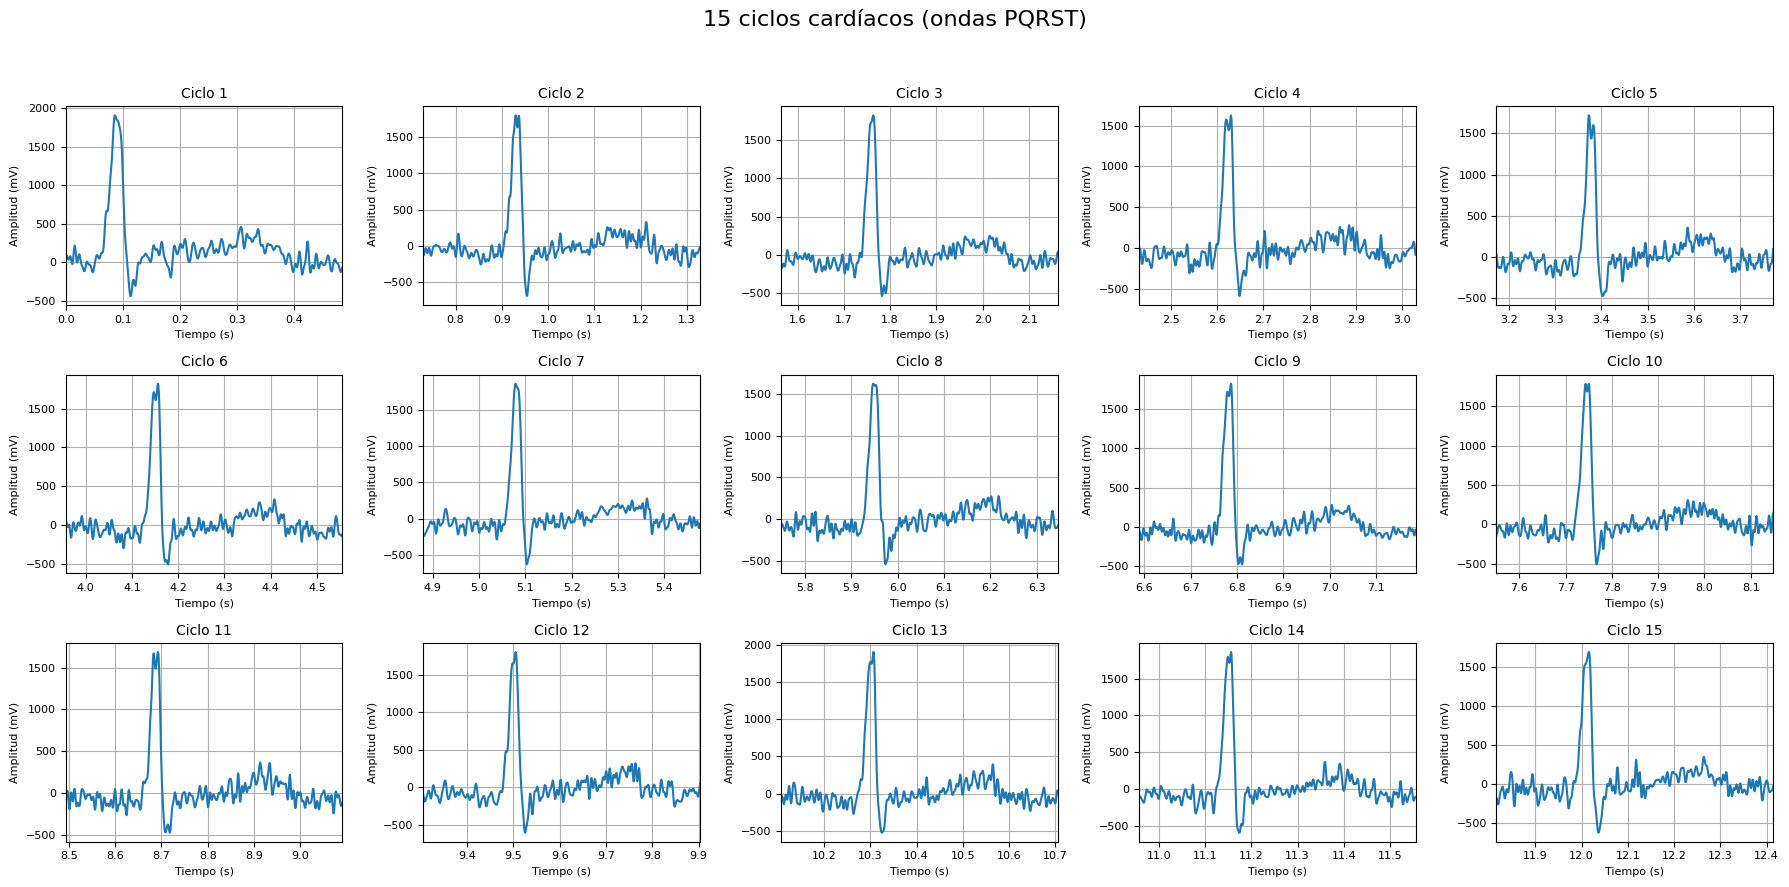

Lista de medias: [180.27, 30.22, 24.92, 14.97, 38.21, 36.9, 37.11, 27.88, 42.13, 53.18, 26.44, 22.92, 45.53, 23.96, 38.73]
Lista de varianzas: [137101.35, 114297.32, 109938.58, 98744.55, 100020.91, 112180.62, 115582.69, 95438.46, 109019.81, 107056.89, 99280.94, 106876.52, 116486.79, 118600.67, 100943.34]


In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Detectar picos R
peaks, _ = find_peaks(ecg_signal_filtered, height=np.max(ecg_signal_filtered) * 0.6, distance=Fs//2)

ventana_antes = int(0.2 * Fs)
ventana_despues = int(0.4 * Fs)

num_ciclos = min(15, len(peaks))  # se asegura que no se exceda el número de picos

fig, axs = plt.subplots(3, 5, figsize=(18, 9))
axs = axs.flatten()  # convertir a lista para iterar fácilmente
lista_media=[]
lista_varianza=[]
lista_ciclos=[]

for i in range(num_ciclos):
    r_index = peaks[i]
    inicio = max(r_index - ventana_antes, 0)
    fin = min(r_index + ventana_despues, len(ecg_signal_filtered))

    ciclo = ecg_signal_filtered[inicio:fin]
    lista_ciclos.append(ciclo)

    tiempo_ciclo = tiempo1[inicio:fin]

    axs[i].plot(tiempo_ciclo, ciclo)
    axs[i].set_title(f'Ciclo {i+1}', fontsize=10)
    axs[i].tick_params(labelsize=8)
    axs[i].grid(True)
    axs[i].set_xlim(tiempo_ciclo[0], tiempo_ciclo[-1])
    axs[i].set_xlabel("Tiempo (s)", fontsize=8)
    axs[i].set_ylabel("Amplitud (mV)", fontsize=8)

    media_filt, _, varianza_filt, _=estadisticas(ciclo)
    lista_media.append(float(round(media_filt, 2)))
    lista_varianza.append(float(round(varianza_filt, 2)))


    print(f"Ciclo {i+1}: Media = {media_filt:.4f}, Varianza = {varianza_filt:.4f}")

fig.suptitle("15 ciclos cardíacos (ondas PQRST)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print("Lista de medias:", lista_media)
print("Lista de varianzas:", lista_varianza)


**Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos
son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico
(prueba U de Mann-Whitney).**

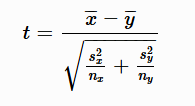

In [43]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.0 MB/s eta 0:00:00


In [44]:
import pingouin as pg

In [53]:
#se compara el ciclo 1 y 2
from scipy.stats import shapiro
#Verificar normalidad
# La prueba de Shapiro-Wilk es un método formal para verificar si una muestra
# de datos proviene de una distribución normal
stat1, p1 = shapiro(lista_ciclos[0])
stat2, p2 = shapiro(lista_ciclos[1])

print(f"Shapiro ciclo 1: p={p1:.4f}")
print(f"Shapiro ciclo 2: p={p2:.4f}")
if p1 > 0.05:
    print("El ciclo 1 parece seguir una distribución normal.")
else:
    print("El ciclo 1 no parece seguir una distribución normal.")

if p2 > 0.05:
    print("El ciclo 2 parece seguir una distribución normal.")
else:
    print("El ciclo 2 no parece seguir una distribución normal.")

Shapiro ciclo 1: p=0.0000
Shapiro ciclo 2: p=0.0000
El ciclo 1 no parece seguir una distribución normal.
El ciclo 2 no parece seguir una distribución normal.


In [59]:
from scipy.stats import levene
#para verificar homocedasticidad
stat_levene, p_levene = levene(lista_ciclos[0], lista_ciclos[1])

print(f"Prueba de Levene: p={p_levene:.4f}")


Prueba de Levene: p=0.0878


In [62]:
import pingouin as pg
#se realiza prueba T entre el ciclo 1 y 2
resultado_t = pg.ttest(lista_ciclos[0], lista_ciclos[1], correction=False)
print(resultado_t)


               T   dof alternative         p-val             CI95%   cohen-d  \
T-test  7.038456  1108   two-sided  3.401115e-12  [108.22, 191.87]  0.424845   

             BF10  power  
T-test  1.709e+09    1.0  


In [64]:
#se compara para el ciclo 2 y 3
from scipy.stats import shapiro
#Verificar normalidad
# La prueba de Shapiro-Wilk es un método formal para verificar si una muestra
# de datos proviene de una distribución normal
stat1, p3 = shapiro(lista_ciclos[1])
stat2, p4 = shapiro(lista_ciclos[2])

print(f"Shapiro ciclo 1: p={p3:.4f}")
print(f"Shapiro ciclo 2: p={p4:.4f}")
if p1 > 0.05:
    print("El ciclo 2 parece seguir una distribución normal.")
else:
    print("El ciclo 2 no parece seguir una distribución normal.")

if p2 > 0.05:
    print("El ciclo 3 parece seguir una distribución normal.")
else:
    print("El ciclo 3 no parece seguir una distribución normal.")

Shapiro ciclo 1: p=0.0000
Shapiro ciclo 2: p=0.0000
El ciclo 2 no parece seguir una distribución normal.
El ciclo 3 no parece seguir una distribución normal.


In [60]:
from scipy.stats import levene
#para verificar homocedasticidad
stat_levene, p_levene = levene(lista_ciclos[1], lista_ciclos[2])

print(f"Prueba de Levene: p={p_levene:.4f}")


Prueba de Levene: p=0.7608


In [65]:
import pingouin as pg
#se realiza prueba T entre el ciclo 1 y 2
resultado_t = pg.ttest(lista_ciclos[1], lista_ciclos[2], correction=False)
print(resultado_t)


               T   dof alternative     p-val            CI95%   cohen-d  \
T-test  0.276883  1224   two-sided  0.781917  [-32.25, 42.85]  0.015815   

         BF10     power  
T-test  0.067  0.058814  


In [67]:
from scipy.stats import mannwhitneyu
#Para ciclo 1 y 2
stat_mwu, p_mwu = mannwhitneyu(lista_ciclos[0], lista_ciclos[1])
print(f"Prueba U de Mann-Whitney: p={p_mwu:.4f}")


Prueba U de Mann-Whitney: p=0.0000


In [68]:
from scipy.stats import mannwhitneyu
#Para ciclo 2 y 3
stat_mwu, p_mwu = mannwhitneyu(lista_ciclos[1], lista_ciclos[2])
print(f"Prueba U de Mann-Whitney: p={p_mwu:.4f}")


Prueba U de Mann-Whitney: p=0.6574


**Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal(Estacionariedad)**

In [69]:
from statsmodels.tsa.stattools import adfuller

# Aplicar prueba Dickey-Fuller a la señal ECG completa o una sección larga
resultado_adf = adfuller(ecg_signal_filtered)

print("Resultados prueba Dickey-Fuller:")
print(f"ADF Statistic: {resultado_adf[0]:.4f}")
print(f"p-value: {resultado_adf[1]:.4f}")
for key, value in resultado_adf[4].items():
    print(f"Valor crítico {key}: {value:.4f}")


Resultados prueba Dickey-Fuller:
ADF Statistic: -24.1341
p-value: 0.0000
Valor crítico 1%: -3.4306
Valor crítico 5%: -2.8616
Valor crítico 10%: -2.5668
